### Business Problem : Understand the dynamics of the labour market of Armenia using the online job portal and create additional features like enhanced search function.

### Statistical Problem : Text mining 

In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

#!pip install textblob
import  textblob
import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import Word 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHRUTI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHRUTI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHRUTI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SHRUTI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
df=pd.read_csv('data job posts.csv')

In [4]:
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

Handling missing values 

In [6]:
#removing un-important variables and having more than 25% missing values

df.drop(['Term','date','AnnouncementCode', 'Eligibility', 'Duration','Audience', 'StartDate', 'Salary','Notes', 'Attach'], axis = 1, inplace = True)

In [7]:
def Missing_imputation(x):
    x = x.fillna(x.mode()[0])
    return x

df = df.apply(lambda x: Missing_imputation(x))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jobpost         19001 non-null  object
 1   Title           19001 non-null  object
 2   Company         19001 non-null  object
 3   Location        19001 non-null  object
 4   JobDescription  19001 non-null  object
 5   JobRequirment   19001 non-null  object
 6   RequiredQual    19001 non-null  object
 7   ApplicationP    19001 non-null  object
 8   OpeningDate     19001 non-null  object
 9   Deadline        19001 non-null  object
 10  AboutC          19001 non-null  object
 11  Year            19001 non-null  int64 
 12  Month           19001 non-null  int64 
 13  IT              19001 non-null  bool  
dtypes: bool(1), int64(2), object(11)
memory usage: 1.9+ MB


### Exploratory Data Analysis

In [9]:
df['RequiredQual'] = df['RequiredQual'].astype(str)
df['count_sent']=df['RequiredQual'].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df['RequiredQual'].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df['RequiredQual'].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df['RequiredQual'].apply(lambda x: len(str(x)))

#Word density

df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df['RequiredQual'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df['RequiredQual'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
df["count_words_lower"] = df['RequiredQual'].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df['RequiredQual'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df['RequiredQual'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df['RequiredQual'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['RequiredQual'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['RequiredQual'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['RequiredQual'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
df['Spaces'] = df['RequiredQual'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['RequiredQual'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['RequiredQual'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['RequiredQual'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'pron'))

### Calculating Sentiment analysis using Textblob module

In [10]:
df['sentiment'] = df["RequiredQual"].apply(lambda x: TextBlob(x).sentiment.polarity )

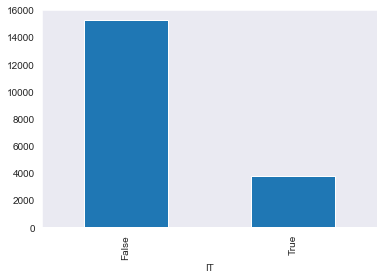

In [11]:
# Classification of stars on basis of reviews
df.IT.value_counts()

# Graphical Representation
grph = df.groupby('IT')['RequiredQual'].count()
grph.plot(kind = 'bar')
plt.show()

In [12]:
# IT job False Percentage
it_false=(df['sentiment']>0).sum()
(it_false/len(df["RequiredQual"]))*100

94.70027893268775

In [13]:
# IT job True Percentage
it_true=(df['sentiment']<0).sum()
(it_true/len(df["RequiredQual"]))*100

3.3314036103362983

### Split the data into Train & Test

In [14]:
# define X and y
X = df.RequiredQual
y = df.IT

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print('X_train: ', len(X_train))
print('X_test: ', len(X_test))
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

X_train:  14250
X_test:  4751
y_train:  14250
y_test:  4751


### Creating user defined functions for clean the text and pre-process the data

In [15]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [16]:
stop = set(nltk.corpus.stopwords.words('english'))

In [17]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    #text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [18]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [19]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

### Vectorization (count, tfidf) for both train & test

In [20]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 3 ),  
                             encoding='latin-1' , 
                             max_df=0.9,min_df=0.001)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [21]:
xtrain_count

<14250x5406 sparse matrix of type '<class 'numpy.int64'>'
	with 463381 stored elements in Compressed Sparse Row format>

### View the document term metrics

In [22]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())
dtm2.head(10)

,able,able independently,abovementioned,abroad,abroad plus,abroad required,academic,academic essential,academic essential english,acca,...,written verbal interpersonal,written verbal knowledge,written verbal russian,written verbal strong,written working,x,xhtml,xml,xp,yerevan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram.fit(df['RequiredQual'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [24]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(1,3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram_chars.fit(df['RequiredQual'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

### Topic Modelling

In [25]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='batch', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [26]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['oral english written oral english oral english armenian written oral high good written oral english armenian good must oral high organizational',
 'good writing good good experience plus least work least least work experience work embedded',
 'excellent strong verbal armenian organizational english russian written verbal english russian good',
 'excellent russian armenian english russian strong russian armenian english russian armenian english english languages armenian english languages',
 'intermediate basic professional higher central basic english selforganizational professional central english profound',
 'preferred desired military scripting designing legal regulating programming physical strong good',
 'strong excellent international armenian working degree related written english experience',
 'oral writing excellent oral writing writing armenian oral writing armenian experience good excellent oral writing armenian russian relevant english professional proper',
 'good program

### Bank data - Word clouds

In [27]:
frequency_words_wo_stop= {}
for data in df['RequiredQual']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [28]:
frequency_words_wo_stop

{'perform': 280,
 'job': 430,
 'successfully': 124,
 ',': 73701,
 'individual': 243,
 'must': 501,
 'able': 354,
 'essential': 289,
 'duty': 36,
 'satisfactorily': 8,
 '.': 25782,
 'requirements': 791,
 'listed': 30,
 'representative': 66,
 'knowledge': 37399,
 'skill': 167,
 '/': 12111,
 'ability': 23313,
 'required': 808,
 ':': 5099,
 '-': 174694,
 'generally': 60,
 'accepted': 137,
 'accounting': 4094,
 'principles': 1329,
 ';': 133324,
 'local': 903,
 'standards': 1368,
 'legislation': 1713,
 'state': 235,
 'reporting': 975,
 'pertaining': 7,
 'practices': 697,
 'financial': 2531,
 'management': 6938,
 'budgeting': 263,
 'systems': 2335,
 'design': 3241,
 'analysis': 1294,
 'contract': 87,
 'records': 70,
 'risk': 296,
 'supervision': 592,
 'information': 1529,
 'apply': 392,
 'sound': 368,
 'fiscal': 26,
 'administrative': 472,
 'company': 714,
 "'": 2840,
 'activities': 633,
 'plan': 306,
 'organize': 291,
 'supervise': 44,
 'work': 20930,
 'subordinate': 3,
 'employees': 105,
 '

In [29]:
from wordcloud import WordCloud ,STOPWORDS

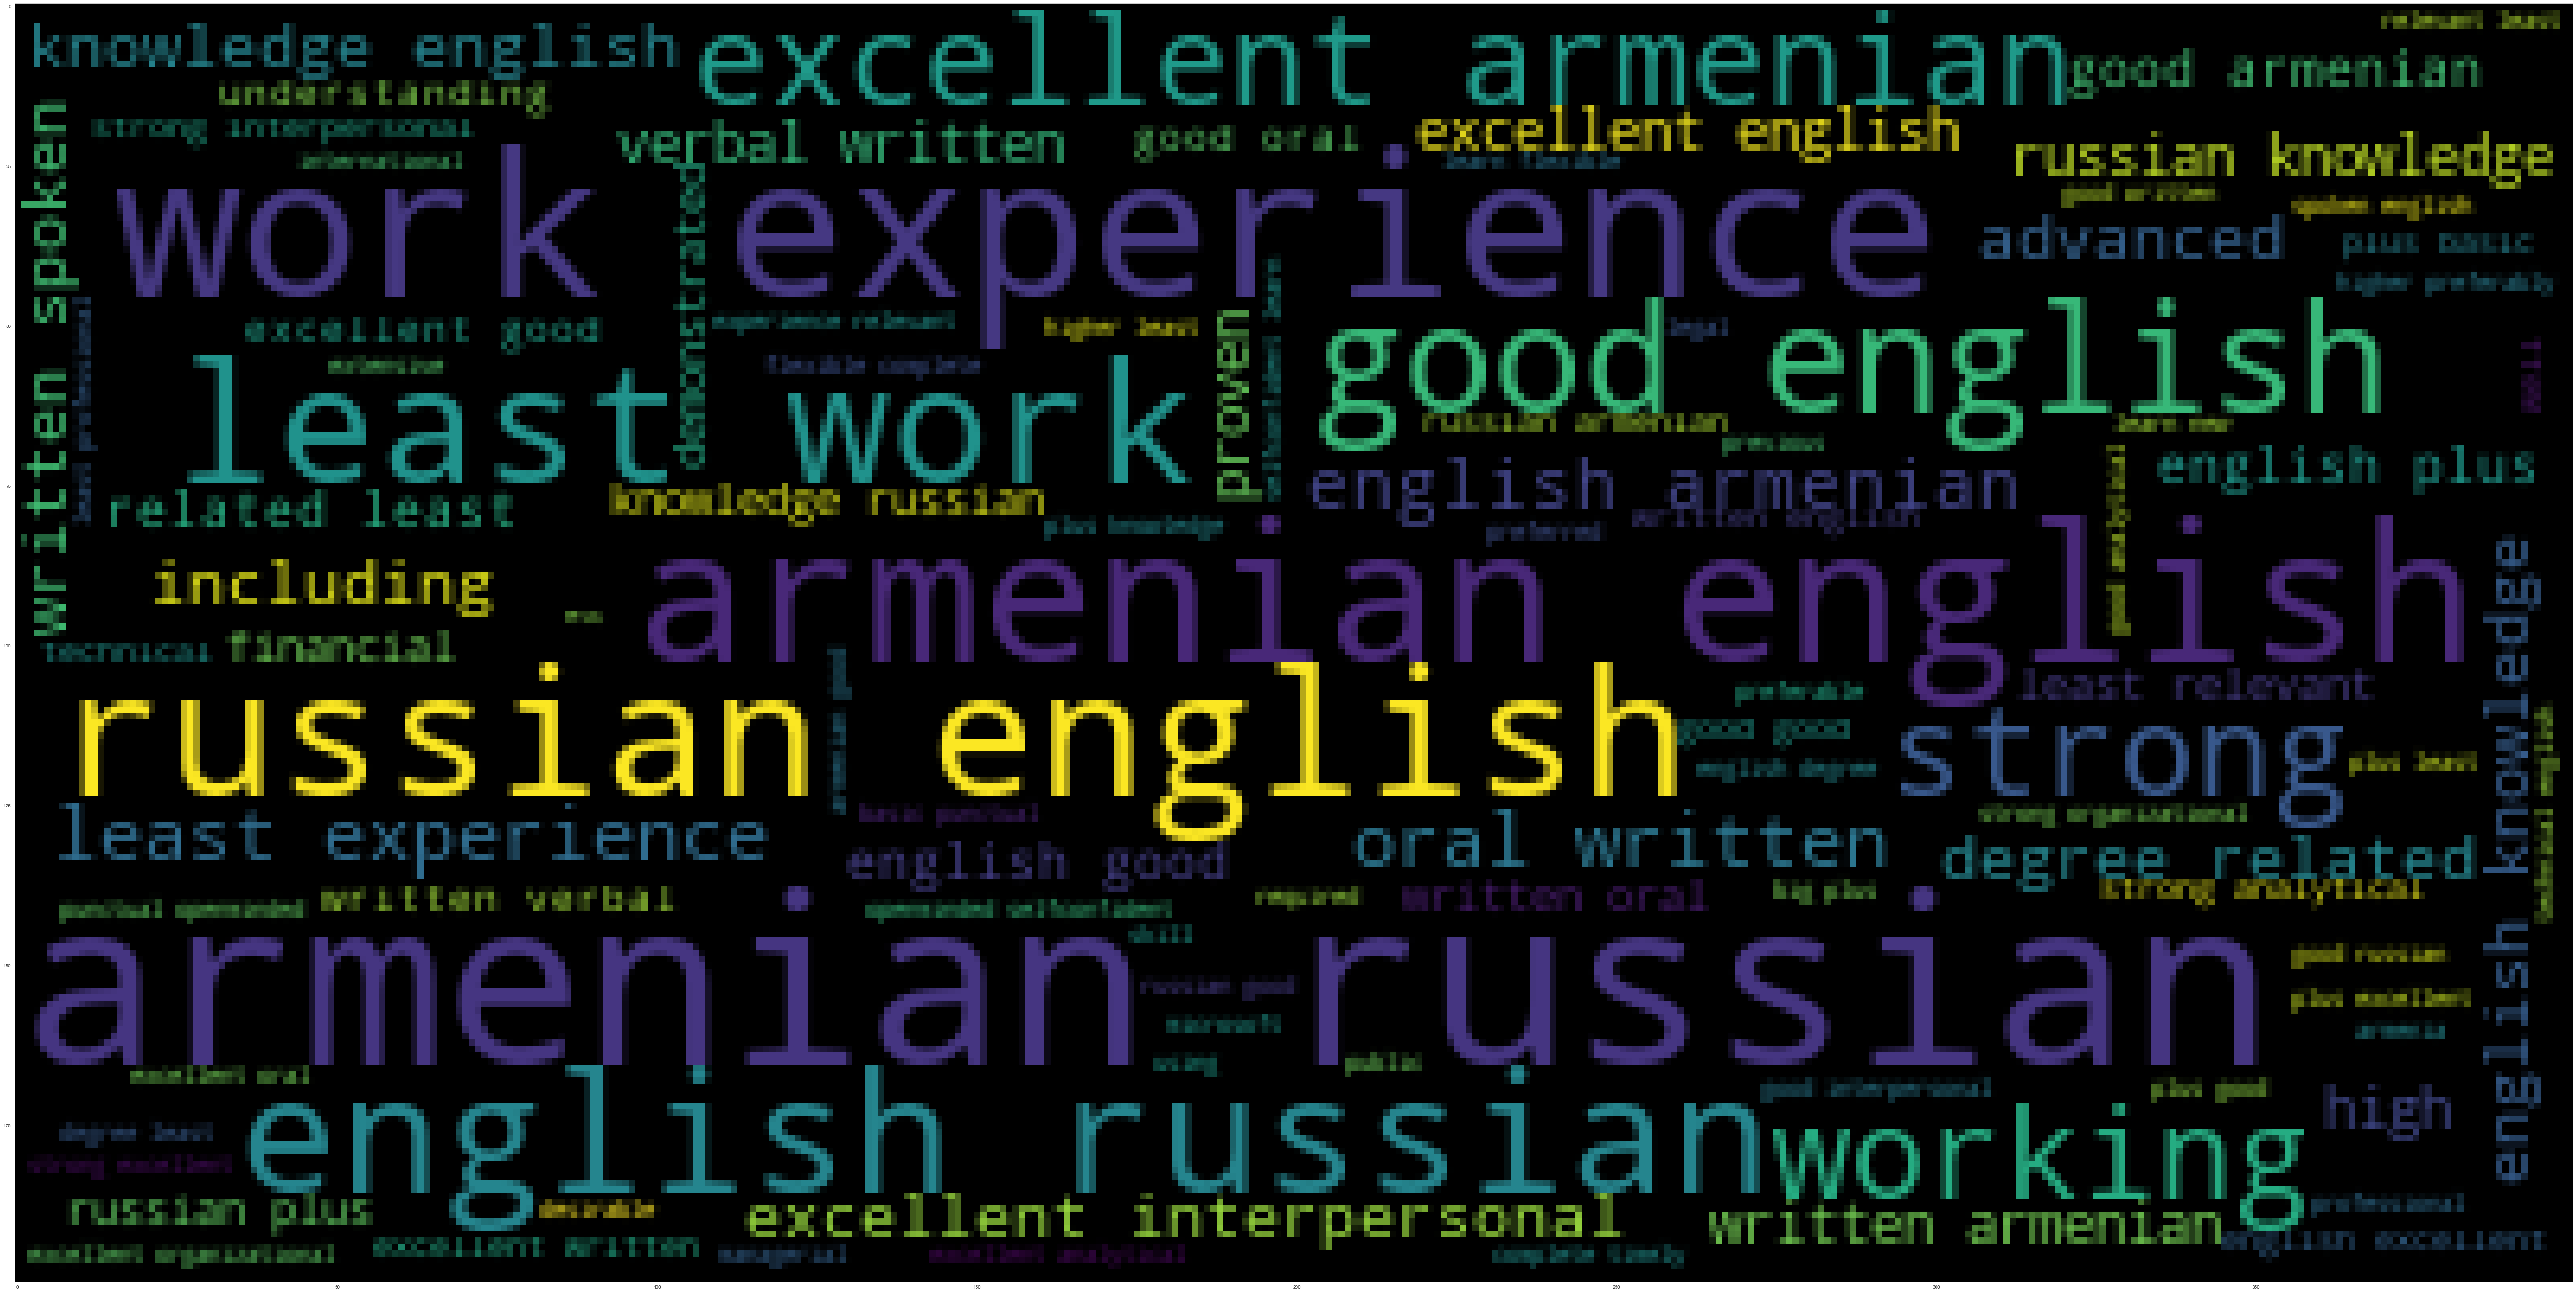

In [30]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)
plt.show()

### Create user defined function for train the models

In [31]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

### Building different models with different vectors

In [42]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB for L1, Count Vectors: ", accuracy_L1)

NB for L1, Count Vectors:  0.9063355083140392


In [43]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB for L1, WordLevel TF-IDF: ", accuracy_L1)

NB for L1, WordLevel TF-IDF:  0.9061250263102505


In [44]:
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB for L1, N-Gram Vectors: ", accuracy_L1)



# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)

NB for L1, N-Gram Vectors:  0.8964428541359714
NB for L1, CharLevel Vectors:  0.8962323721321827


In [45]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR for L1, N-Gram Vectors: ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR for L1, Count Vectors:  0.918753946537571
LR for L1, WordLevel TF-IDF:  0.9263312986739634
LR for L1, N-Gram Vectors:  0.918122500526205
LR for L1, CharLevel Vectors:  0.9071774363291939


In [46]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC for L1, N-Gram Vectors: ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC for L1, Count Vectors:  0.9290675647232162
SVC for L1, WordLevel TF-IDF:  0.9111765944011787
SVC for L1, N-Gram Vectors:  0.9263312986739634
SVC for L1, CharLevel Vectors:  0.9210692485792464


In [47]:
#Random Forest
# Random Forest on Count Vectors and TF-IDF
accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR for L1, Count Vectors: ", accuracy_L1)



# Random Forest on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR for L1, WordLevel TF-IDF: ", accuracy_L1)



# Random Forest on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR for L1, N-Gram Vectors: ", accuracy_L1)



# Random Forest on Character Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR for L1, Count Vectors:  0.9368553988633972
LR for L1, WordLevel TF-IDF:  0.9393811829088613
LR for L1, N-Gram Vectors:  0.9343296148179331
LR for L1, CharLevel Vectors:  0.9349610608292991


In [48]:
#Gradient Boosting
# Gradient Boosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(GradientBoostingClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR for L1, Count Vectors: ", accuracy_L1)



# Gradient Boosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(GradientBoostingClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR for L1, WordLevel TF-IDF: ", accuracy_L1)



# Gradient Boosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(GradientBoostingClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR for L1, N-Gram Vectors: ", accuracy_L1)



# Gradient Boosting on Character Level TF IDF Vectors
accuracy_L1 = train_model(GradientBoostingClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR for L1, Count Vectors:  0.9080193643443486
LR for L1, WordLevel TF-IDF:  0.9029677962534204
LR for L1, N-Gram Vectors:  0.9059145443064618
LR for L1, CharLevel Vectors:  0.9086508103557146


In [49]:
#ANN
# ANN on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR for L1, Count Vectors: ", accuracy_L1)



# ANN on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR for L1, WordLevel TF-IDF: ", accuracy_L1)



# ANN on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR for L1, N-Gram Vectors: ", accuracy_L1)



# ANN on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR for L1, Count Vectors:  0.909703220374658
LR for L1, WordLevel TF-IDF:  0.9269627446853294
LR for L1, N-Gram Vectors:  0.9168596085034729
LR for L1, CharLevel Vectors:  0.9263312986739634


In [50]:
#ANN + logistic
# ANN + logistic on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR for L1, Count Vectors: ", accuracy_L1)



# ANN + logistic on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_count, y_train, xtest_count, y_test)
print("LR for L1, WordLevel TF-IDF: ", accuracy_L1)



# ANN + logistic on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR for L1, N-Gram Vectors: ", accuracy_L1)



# ANN + logistic on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR for L1, Count Vectors:  0.9120185224163334
LR for L1, WordLevel TF-IDF:  0.9054935802988845
LR for L1, N-Gram Vectors:  0.9141233424542201
LR for L1, CharLevel Vectors:  0.9153862344769522


### Adding Features to a Document-Term Matrix

In [60]:
# define X and y
feature_cols = ['RequiredQual','sentiment']
X = df[feature_cols]
y = df.IT

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [61]:
# use CountVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.9,min_df=0.001, ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(14250, 11266)
(4751, 11266)


(14250, 1)

In [63]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('RequiredQual', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('RequiredQual', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(4751, 11267)

In [64]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
acc_log=metrics.accuracy_score(y_test, y_pred_class)
acc_log

0.9305409387497369

In [65]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
acc_log1=metrics.accuracy_score(y_test, y_pred_class)
acc_log1

0.9315933487686803

In [66]:
# use random forest with text column only
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm, y_train)
y_pred_class = rmf.predict(X_test_dtm)
acc_rmf=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf

0.9383287728899179

In [67]:
# use random forest with all features
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm_extra, y_train)
y_pred_class = rmf.predict(X_test_dtm_extra)
acc_rmf1=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf1

0.9389602189012839

In [68]:
# use gradient boosting with text column only
gbc =  GradientBoostingClassifier()
gbc.fit(X_train_dtm, y_train)
y_pred_class = gbc.predict(X_test_dtm)
acc_grad=metrics.accuracy_score(y_test, y_pred_class)
acc_grad

0.9075984003367712

In [69]:
# use gradient boosting with all features
gbc = GradientBoostingClassifier()
gbc.fit(X_train_dtm_extra, y_train)
y_pred_class = gbc.predict(X_test_dtm_extra)
acc_grad1=metrics.accuracy_score(y_test, y_pred_class)
acc_grad1

0.9080193643443486

In [70]:
# use ANN with text column only
mp = MLPClassifier()
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp

0.9282256367080615

In [71]:
# use ANN with all features
mp = MLPClassifier()
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp1

0.9288570827194275

In [72]:
# use ANN+logistic with text column only
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp_ln=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln

0.9299094927383709

In [73]:
# use ANN+logistic with all features
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp_ln1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln1

0.9275941906966955

Text(0.5, 16.0, 'Predicted label')

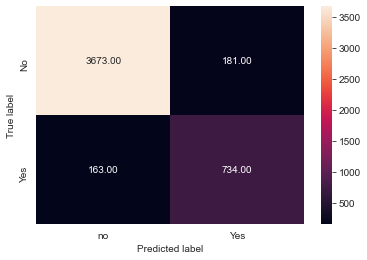

In [74]:
cm = metrics.confusion_matrix( y_test, y_pred_class)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [75]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'Gradient Boosting','ANN','ANN + logistic'],
    
    'Score': [acc_log,acc_rmf,acc_grad,acc_mlp,acc_mlp_ln]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.938329
0,Logistic Regression,0.930541
4,ANN + logistic,0.929909
3,ANN,0.928226
2,Gradient Boosting,0.907598


In [76]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'Gradient Boosting','ANN','ANN + logistic'],
    
    'Score': [acc_log1,acc_rmf1,acc_grad1,acc_mlp1,acc_mlp_ln1]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.938960
0,Logistic Regression,0.931593
3,ANN,0.928857
4,ANN + logistic,0.927594
2,Gradient Boosting,0.908019


### Random Forest has the best score, hence, the most apt model is Random Forest.